#### A5 – FEATURE EXTRACTION PART 1 OF 3: IMAGE SEGMENTATION

Andeo, Lovely\
2020-05405\
FX-2

**Short Exercise**

First is to input all the necesssary libraries and packages needed.

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.io import imread, imshow

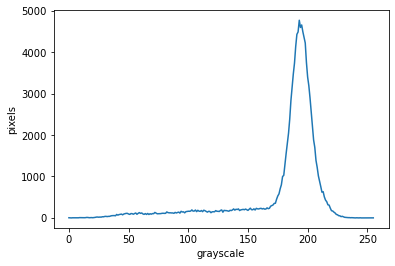

In [9]:
# Loading the grayscale image
I = Image.open('cropped_grayscale_check.jpg').convert('L')

# Calculating the histogram
count, cells = I.histogram(), list(range(256)) # returns list of pixel counts for each intensity level

# Displaying the histogram
plt.plot(cells, count)
plt.xlabel('grayscale')
plt.ylabel('pixels')
plt.show()


Segmenting the regions of interest by setting a threshold

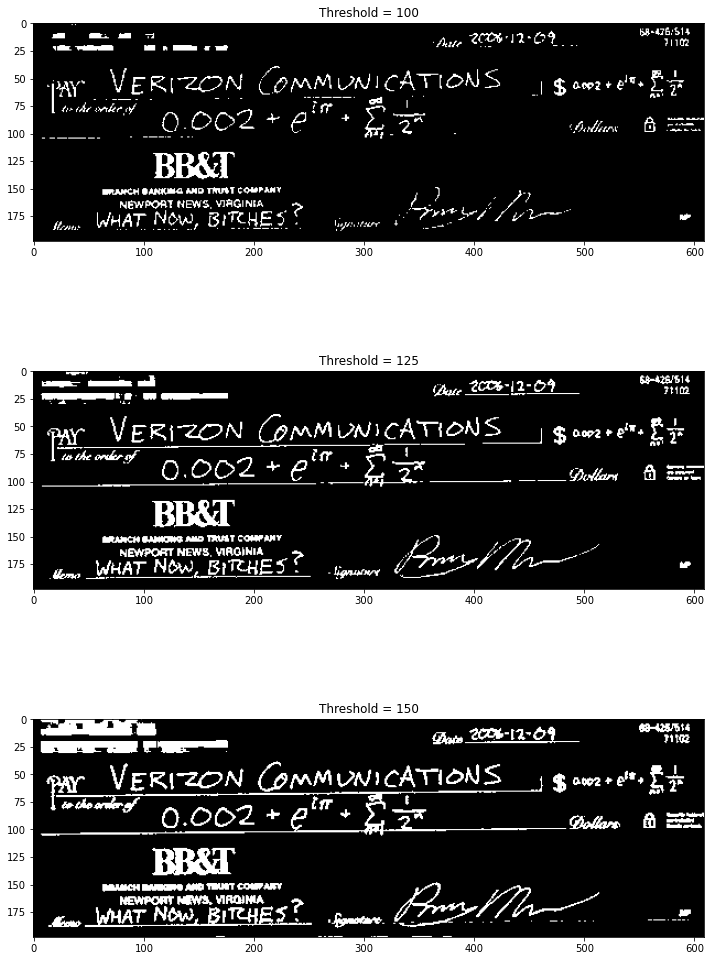

In [12]:
# Defining a list of threshold values to test
thresholds = [100, 125, 150]

# Creating a figure with subplots for each thresholded image
fig, axes = plt.subplots(len(thresholds), 1, figsize=(10, 15))

# Looping over the threshold values and display the thresholded images
for i, t in enumerate(thresholds):
    # Thresholding the image
    BW = np.array(I) < t
    
    # Displaying the thresholded image
    axes[i].imshow(BW, cmap='gray')
    axes[i].set_title('Threshold = {}'.format(t))

plt.tight_layout()
plt.show()


**Parametric vs Non-Parametric Probability Distribution Estimation**
1. Capture or download a digital image of a 3D object with parts that have single color (e.g. colored mugs, skin, NIPS or Skittles candy, colored paper, brightly colored bottles, etc.).
2. Crop a monochromatic region of interest in the scene.
3. Transform color RGB into normalized chromaticity coordinates rgI.
4. Parametric segmentation – derive the Gaussian PDF in the r and g values separately of the
ROI and segment the whole image.
5. Non-parametric segmentation – Obtain the 2D histogram of the ROI. To test if your histogram is correct, compare the location of the peaks with the rg chromaticity diagram in Figure 6. Justify your results. Use the histogram itself to segment the image using histogram backprojection.
6. In your results and discussion, compare the outcomes of the two techniques.

Observe the distibution of the Red and Green color space

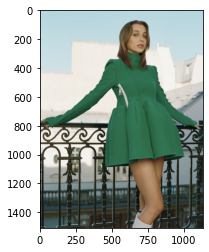

In [56]:
image = imread('Emma.png')
img = Image.fromarray(image)
plt.imshow(img)

(0.0, 1.0)

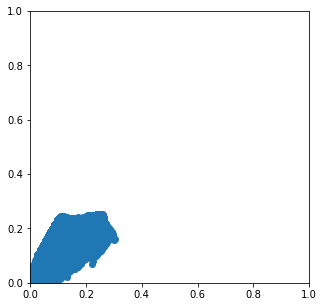

In [57]:
paint_R = image[:,:,0]*1.0/image.sum(axis=2)
paint_G = image[:,:,1]*1.0/image.sum(axis=2)
plt.figure(figsize=(5,5))
plt.scatter(paint_R.flatten(),paint_G.flatten())
plt.xlim(0,1)
plt.ylim(0,1)

Getting the 2D histogram values

(0.0, 1.0)

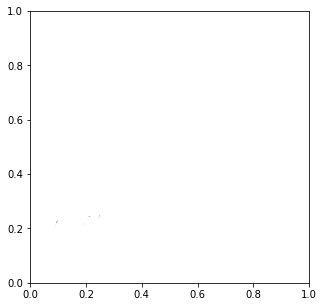

In [58]:
plt.figure(figsize=(5,5))
plt.hist2d(paint_R.flatten(), paint_G.flatten(), bins=100,cmap='binary')
plt.xlim(0,1)
plt.ylim(0,1)

To identify the colors and their specific locations, we need to take a reference patch and take the RG chromaticity

/Users/lovelyandeo/opt/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


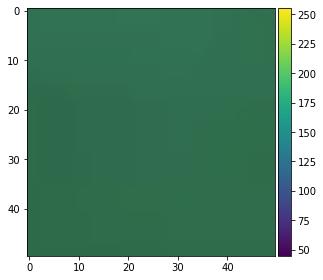

In [59]:
# Reference patch
patch = image[500:550,600:650,:]
imshow(patch)

(0.0, 1.0)

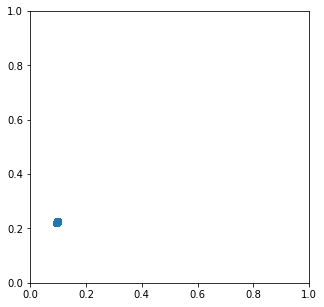

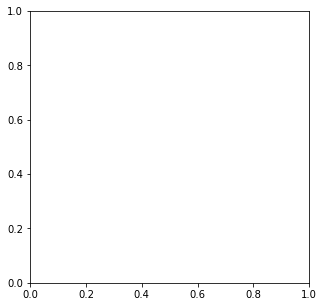

In [60]:
#scatterplot
patch_R = patch[:,:,0]*1.0/patch.sum(axis=2)
patch_G = patch[:,:,1]*1.0/patch.sum(axis=2)
plt.figure(figsize=(5,5))
plt.scatter(patch_R.flatten(),patch_G.flatten())
plt.xlim(0,1)
plt.ylim(0,1)
#histogram
plt.figure(figsize=(5,5))
plt.hist2d(patch_R.flatten(), patch_G.flatten(), bins=100,cmap='binary')
plt.xlim(0,1)
plt.ylim(0,1)

In [61]:
#Parametric Magic
std_patch_R = np.std(patch_R.flatten())
mean_patch_R = np.mean(patch_R.flatten())
std_patch_G = np.std(patch_G.flatten())
mean_patch_G = np.mean(patch_G.flatten())
#Making the gaussian work
def gaussian(p,mean,std):
    return np.exp(-(p-mean)**2/(2*std**2))*(1/(std*((2*np.pi)**0.5)))

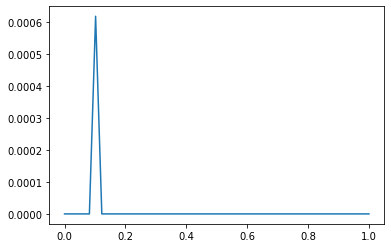

In [62]:
x = np.linspace(0,1)
y = gaussian(x,mean_patch_R,std_patch_R)
plt.plot(x,y)

Text(0.5, 1.0, 'G Space')

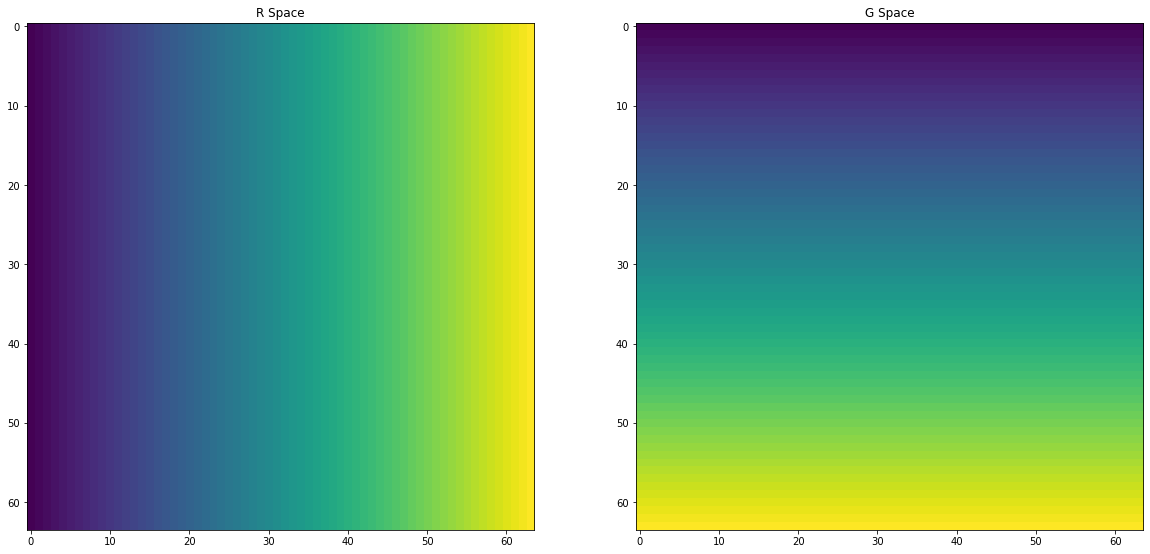

In [63]:
r_test = np.tile(np.linspace(0,1,64),(64,1))
g_test = r_test.transpose()

# Ploting the results
fig, axs = plt.subplots(1, 2, figsize=(20, 12))

axs[0].imshow(r_test)
axs[0].set_title('R Space')

axs[1].imshow(g_test)
axs[1].set_title('G Space')

Text(0.5, 1.0, 'R * G')

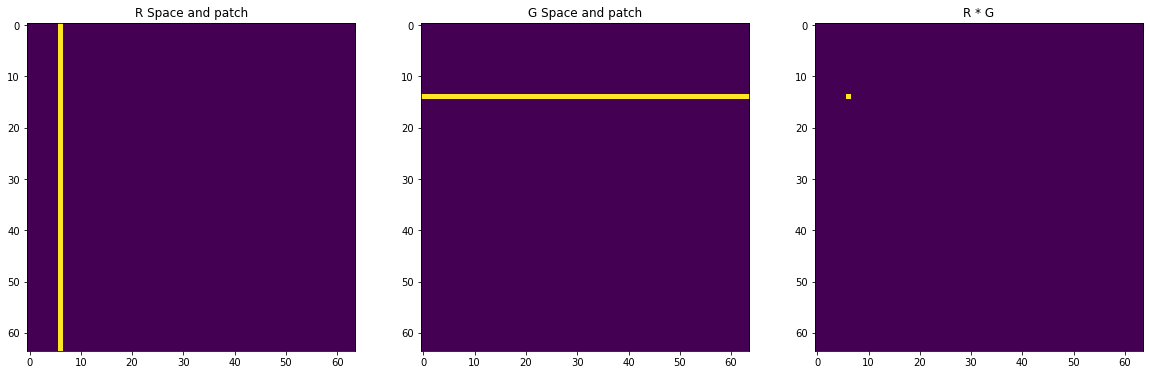

In [64]:
#Test sample R and G space into the gaussian distribution with the generated patch

#R space with patch
test_R = gaussian(r_test,mean_patch_R,std_patch_R)
#G space with patch
test_G = gaussian(g_test,mean_patch_G,std_patch_G)

prob_test=test_R * test_G

# Ploting the results
fig, axs = plt.subplots(1, 3, figsize=(20, 12))

axs[0].imshow(test_R)
axs[0].set_title('R Space and patch')

axs[1].imshow(test_G)
axs[1].set_title('G Space and patch')

axs[2].imshow(prob_test)
axs[2].set_title('R * G')

Text(0.5, 1.0, 'R*G')

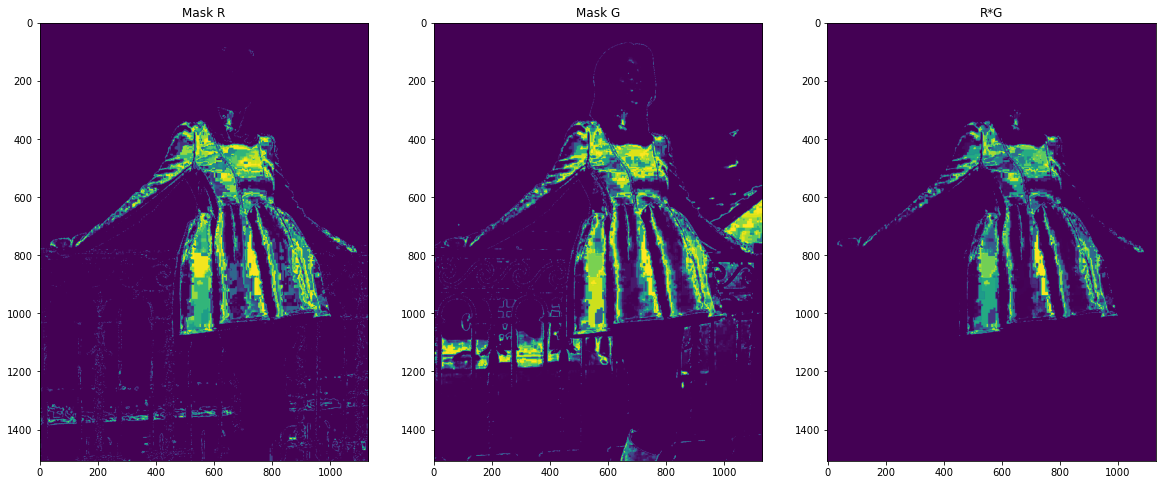

In [65]:
prob_R = gaussian(paint_R,mean_patch_R,std_patch_R)
prob_G = gaussian(paint_G,mean_patch_G,std_patch_G)
prob=prob_R * prob_G

# Ploting the results
fig, axs = plt.subplots(1, 3, figsize=(20, 12))

axs[0].imshow(prob_R)
axs[0].set_title('Mask R')

axs[1].imshow(prob_G)
axs[1].set_title('Mask G')

axs[2].imshow(prob)
axs[2].set_title('R*G')

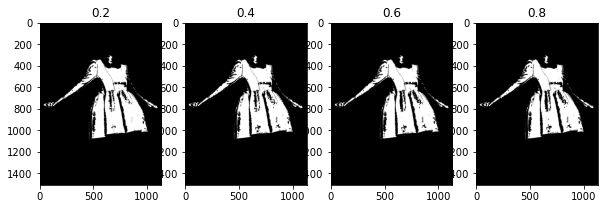

In [66]:
prob_list = [0.2, 0.4, 0.6, 0.8]
fig, ax = plt.subplots(1,4, figsize=(10,10))
for i in range(4):
    ax[i].imshow(prob > prob_list[i], cmap='gray')
    ax[i].set_title(prob_list[i])
plt.show()

Text(0.5, 1.0, 'Masked image')

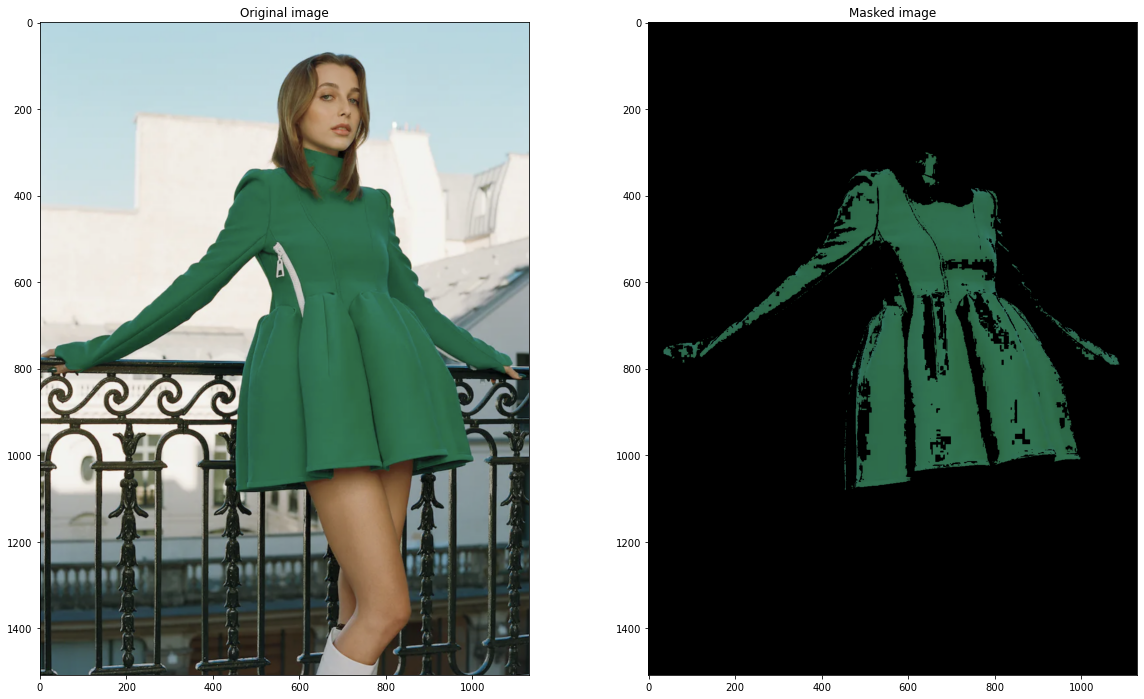

In [68]:
mask = prob > 0.8
red = image[:,:,0]*mask
green = image[:,:,1]*mask
blue = image[:,:,2]*mask
image_masked = np.dstack((red,green,blue))

fig, axs = plt.subplots(1, 2, figsize=(20, 12))

axs[0].imshow(img)
axs[0].set_title('Original image')

axs[1].imshow(image_masked)
axs[1].set_title('Masked image')